# 최종 파일

In [211]:
import pandas as pd

# CSV 파일 불러오기
file_path = 'data/2021~2023/final_reordered.csv'
df = pd.read_csv(file_path)

# 데이터프레임 확인
df.head(1)

,매출_금액,기준_년도,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대_00~06,시간대_06~11,시간대_11~14,시간대_14~17,시간대_17~21,...,총_가구_수,총_상주인구_수,총_직장_인구_수,시간대_별_유동인구_수,평일_유동인구_수_평균,주말_유동인구_수_평균,월_평균_소득_금액,소득_구간_코드,지출_총금액,집객시설_수
0,62575582,2021,골목상권,포이초등학교(개포목련어린이공원),개포4동,1,0,0,0,0,...,1912,4267,1556,310492,130664.0,127941.0,3091267.0,7.0,1.995713e+09,9


In [212]:
# 컬럼 확인
print(df.columns)

Index(['매출_금액', '기준_년도', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명', '시간대_00~06',
       '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24',
       '기준_분기_1', '기준_분기_2', '기준_분기_3', '기준_분기_4', '총_가구_수', '총_상주인구_수',
       '총_직장_인구_수', '시간대_별_유동인구_수', '평일_유동인구_수_평균', '주말_유동인구_수_평균',
       '월_평균_소득_금액', '소득_구간_코드', '지출_총금액', '집객시설_수'],
      dtype='object')


In [213]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# EDA

## 종속변수인 매출_금액 시각화

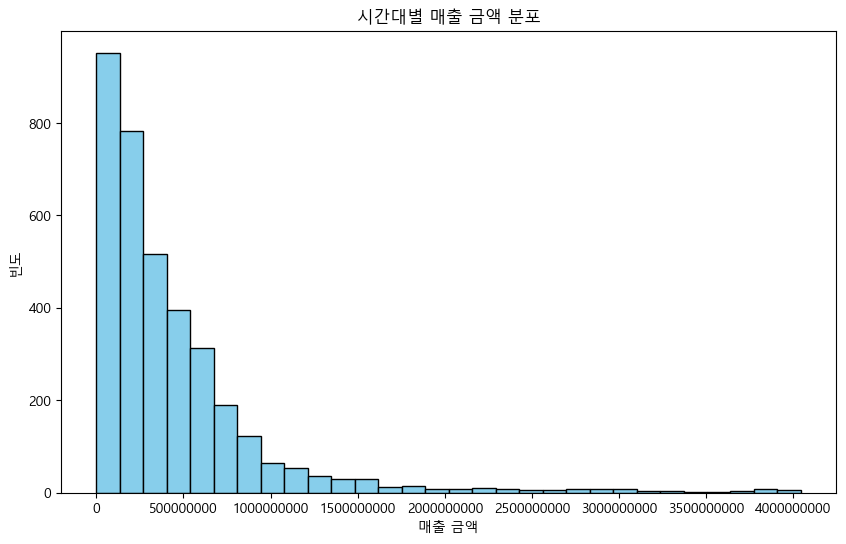

In [214]:
import matplotlib.pyplot as plt

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['매출_금액'], bins=30, color='skyblue', edgecolor='black')
plt.title('시간대별 매출 금액 분포')
plt.xlabel('매출 금액')
plt.ylabel('빈도')
plt.ticklabel_format(style='plain', axis='x')  # 과학적 표기법 비활성화
plt.show()

## 기준_년도 별 시간대 평균 매출

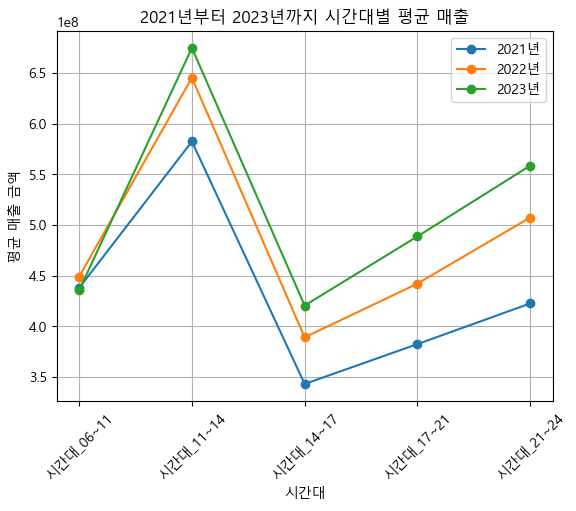

In [215]:
import matplotlib.pyplot as plt

# 기준_년도가 2021, 2022, 2023이고 각 시간대 컬럼의 값이 1인 데이터 필터링
filtered_data = df[(df['기준_년도'].isin([2021, 2022, 2023])) & 
                   ((df['시간대_06~11'] == 1) |
                   (df['시간대_11~14'] == 1) |
                   (df['시간대_14~17'] == 1) |
                   (df['시간대_17~21'] == 1) |
                   (df['시간대_21~24'] == 1))]

# 연도별 시간대별로 매출_금액의 평균 계산
avg_sales = filtered_data.groupby(['기준_년도', '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'])['매출_금액'].mean()

# 그래프 그리기
fig, ax = plt.subplots()

for year in [2021, 2022, 2023]:
    avg_sales.xs(year).plot(kind='line', marker='o', linestyle='-', ax=ax, label=f'{year}년')

plt.title('2021년부터 2023년까지 시간대별 평균 매출')
plt.xlabel('시간대')
plt.ylabel('평균 매출 금액')
plt.xticks(range(5), ['시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'], rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## 기준_분기 별 시간대 평균 매출

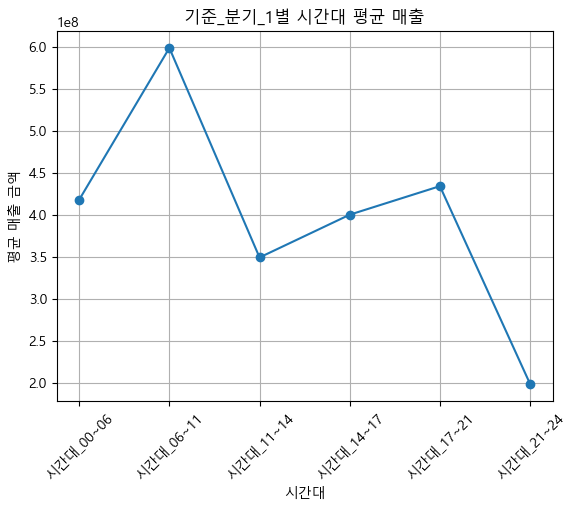

In [216]:
import matplotlib.pyplot as plt

# 기준_분기_1의 컬럼 값이 1인 데이터 필터링
filtered_data = df[df['기준_분기_1'] == 1]

# 분기별 시간대별로 매출_금액의 평균 계산
avg_sales = filtered_data.groupby(['기준_분기_1', '시간대_00~06', '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'])['매출_금액'].mean()

# 그래프 그리기
fig, ax = plt.subplots()

for quarter in filtered_data['기준_분기_1'].unique():
    avg_sales.xs(quarter).plot(kind='line', marker='o', linestyle='-', ax=ax, label=f'분기 {quarter}')

plt.title('기준_분기_1별 시간대 평균 매출')
plt.xlabel('시간대')
plt.ylabel('평균 매출 금액')
plt.xticks(range(6), ['시간대_00~06', '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'], rotation=45)
plt.grid(True)
plt.show()

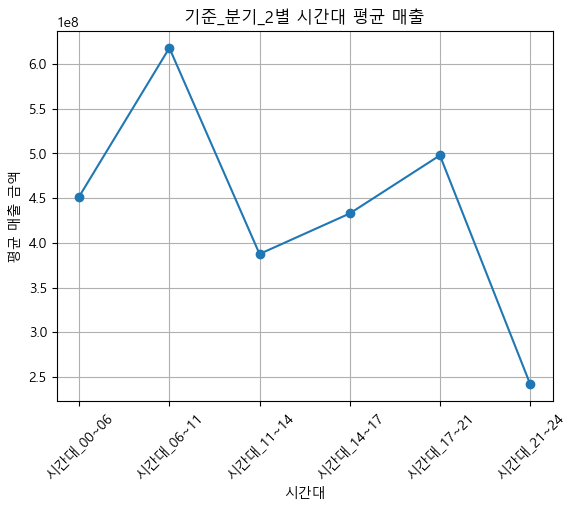

In [217]:
import matplotlib.pyplot as plt

# 기준_분기_1의 컬럼 값이 1인 데이터 필터링
filtered_data = df[df['기준_분기_2'] == 1]

# 분기별 시간대별로 매출_금액의 평균 계산
avg_sales = filtered_data.groupby(['기준_분기_2', '시간대_00~06', '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'])['매출_금액'].mean()

# 그래프 그리기
fig, ax = plt.subplots()

for quarter in filtered_data['기준_분기_2'].unique():
    avg_sales.xs(quarter).plot(kind='line', marker='o', linestyle='-', ax=ax, label=f'분기 {quarter}')

plt.title('기준_분기_2별 시간대 평균 매출')
plt.xlabel('시간대')
plt.ylabel('평균 매출 금액')
plt.xticks(range(6), ['시간대_00~06', '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'], rotation=45)
plt.grid(True)
plt.show()

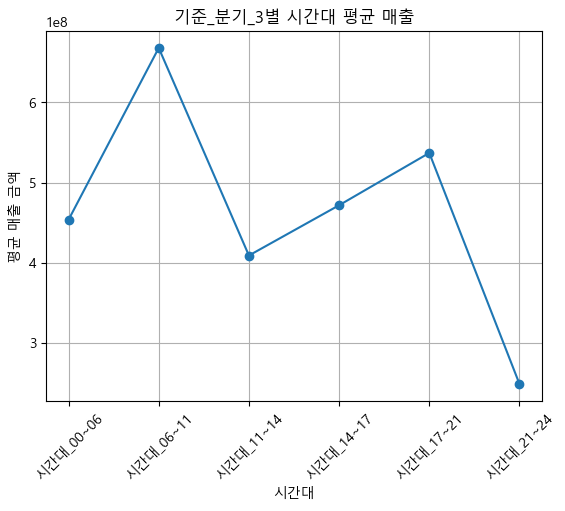

In [218]:
import matplotlib.pyplot as plt

# 기준_분기_3의 컬럼 값이 1인 데이터 필터링
filtered_data = df[df['기준_분기_3'] == 1]

# 분기별 시간대별로 매출_금액의 평균 계산
avg_sales = filtered_data.groupby(['기준_분기_3', '시간대_00~06', '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'])['매출_금액'].mean()

# 그래프 그리기
fig, ax = plt.subplots()

for quarter in filtered_data['기준_분기_3'].unique():
    avg_sales.xs(quarter).plot(kind='line', marker='o', linestyle='-', ax=ax, label=f'분기 {quarter}')

plt.title('기준_분기_3별 시간대 평균 매출')
plt.xlabel('시간대')
plt.ylabel('평균 매출 금액')
plt.xticks(range(6), ['시간대_00~06', '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'], rotation=45)
plt.grid(True)
plt.show()

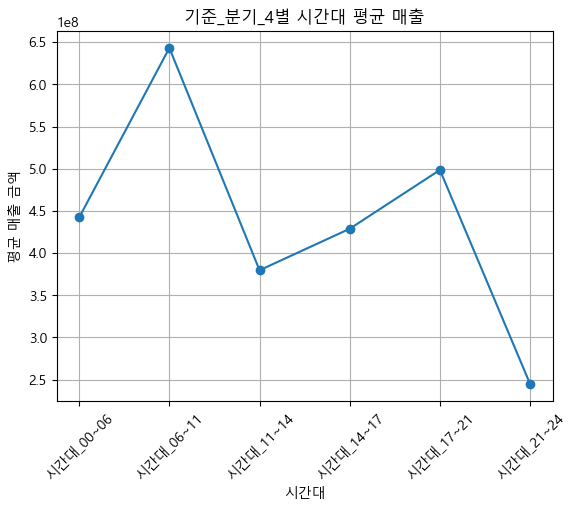

In [219]:
import matplotlib.pyplot as plt

# 기준_분기_4의 컬럼 값이 1인 데이터 필터링
filtered_data = df[df['기준_분기_4'] == 1]

# 분기별 시간대별로 매출_금액의 평균 계산
avg_sales = filtered_data.groupby(['기준_분기_4', '시간대_00~06', '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'])['매출_금액'].mean()

# 그래프 그리기
fig, ax = plt.subplots()

for quarter in filtered_data['기준_분기_4'].unique():
    avg_sales.xs(quarter).plot(kind='line', marker='o', linestyle='-', ax=ax, label=f'분기 {quarter}')

plt.title('기준_분기_4별 시간대 평균 매출')
plt.xlabel('시간대')
plt.ylabel('평균 매출 금액')
plt.xticks(range(6), ['시간대_00~06', '시간대_06~11', '시간대_11~14', '시간대_14~17', '시간대_17~21', '시간대_21~24'], rotation=45)
plt.grid(True)
plt.show()

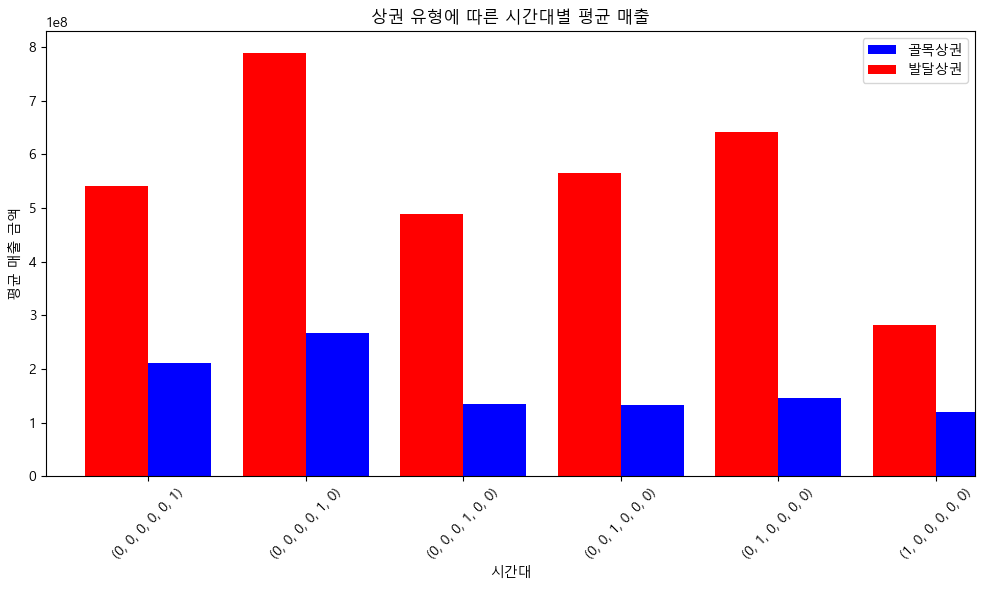

In [238]:
import matplotlib.pyplot as plt

# '상권_구분_코드_명'이 '골목상권'인 데이터 추출
golmok_sales_data = df[df['상권_구분_코드_명'] == '골목상권']

# '상권_구분_코드_명'이 '발달상권'인 데이터 추출
balchal_sales_data = df[df['상권_구분_코드_명'] == '발달상권']

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 골목상권 시간대별 평균 매출 그래프
avg_sales_by_time_golmok.plot(kind='bar', color='blue', position=0, width=0.4, label='골목상권')

# 발달상권 시간대별 평균 매출 그래프
avg_sales_by_time_balchal.plot(kind='bar', color='red', position=1, width=0.4, label='발달상권')

plt.title('상권 유형에 따른 시간대별 평균 매출')
plt.xlabel('시간대')
plt.ylabel('평균 매출 금액')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 행정동_코드_명에 따른 매출_금액의 평균 계산
avg_sales_by_dong = df.groupby('행정동_코드_명')['매출_금액'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = avg_sales_by_dong.plot(kind='bar')
plt.title('행정동_코드_명별 시간대 평균 매출')
plt.xlabel('행정동_코드_명')
plt.ylabel('평균 매출 금액')
plt.xticks(rotation=45, ha='right')

# 막대 위에 값 표시
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{bar.get_height():.2f}', 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()